## Reto 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aplicar la técnica de división del dataset en entrenamiento y prueba para entrenar un modelo de Regresión Linear Múltiple

---
    
### 2. Desarrollo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

1. Explora las correlaciones que existen entre estas variables.
2. Elige dos o más variables independientes y una variable dependiente.
3. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
4. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
5. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
6. Evalúa tu modelo usando el dataset de prueba.
7. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
8. Presenta tus hallazgos a tus compañeros.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from google.colab import userdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta = userdata.get('ruta')

df = pd.read_csv(ruta + 'wine_quality_red-clean.csv', index_col=0)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
correlaciones = df.corr()
correlaciones

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


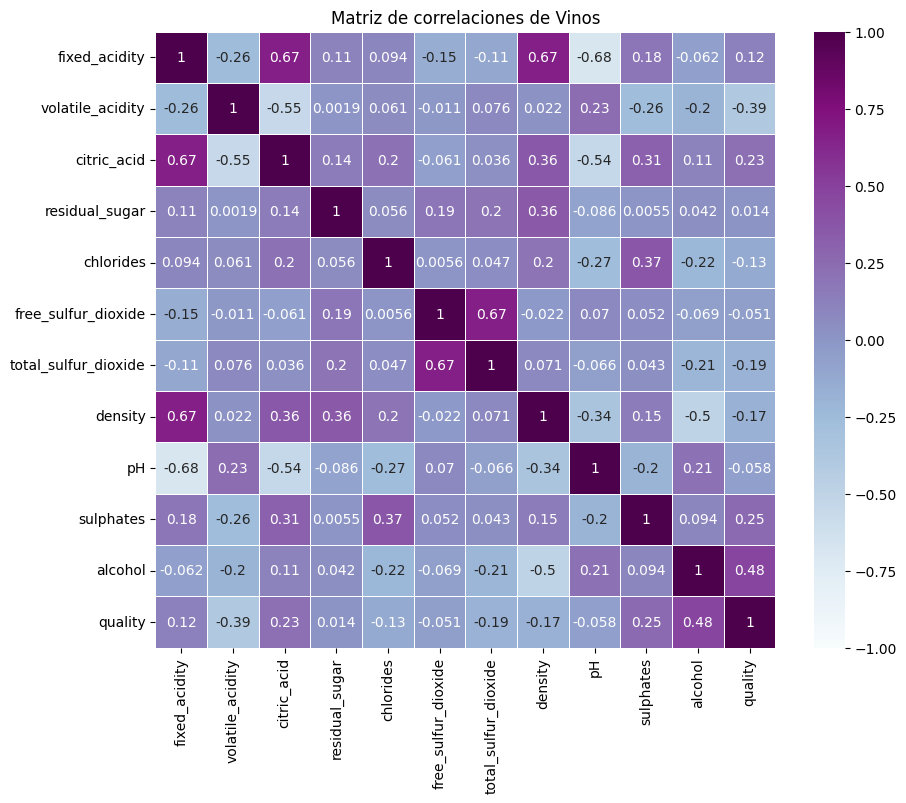

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="BuPu", linewidths=.5)
plt.title('Matriz de correlaciones de Vinos')
plt.show()

In [ ]:
# Definir X e y
X_example1 = df[['density', 'citric_acid']]  # Variables independientes
y_example1 = df['fixed_acidity']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_example1, y_example1, test_size=0.3, shuffle=True, random_state=42)

# Entrenar el modelo
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)

# Obtener coeficientes y R²
coef1 = lr1.coef_
intercept1 = lr1.intercept_
r2_1 = lr1.score(X_test1, y_test1)

In [ ]:
# Mostrar resultados

resultados = pd.DataFrame({
    "Columnas": ["density, citric_acid"],
    "Coeficientes (Pendientes)": [coef1,],
    "Intercepto": [intercept1],
    "R² (Prueba)": [r2_1,]
})

# Estandarizar los valores numéricos a 4 decimales
resultados['Coeficientes (Pendientes)'] = resultados['Coeficientes (Pendientes)'].apply(
    lambda x: [round(i, 4) for i in x]
)
resultados['Intercepto'] = resultados['Intercepto'].round(4)
resultados['R² (Prueba)'] = resultados['R² (Prueba)'].round(4)

In [ ]:
print(f"Resultados del entrenamiento:")
resultados

Resultados del entrenamiento:


,Columnas,Coeficientes (Pendientes),Intercepto,R² (Prueba)
0,"density, citric_acid","[445.2824, 4.2474]",-436.686,0.7051


***Conclusiones:***

* El modelo de regresión lineal múltiple con density y citric_acid como variables independientes es efectivo para predecir fixed_acidity, ya que explica el 70.51% de la variabilidad en la acidez fija.

* La densidad (density) tiene un impacto mucho mayor en la acidez fija en comparación con el ácido cítrico (citric_acid).